In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'src\date_univ.csv', sep=';')
df.head()

,Entitate,Nr_proiecte_finantate,Abreviere,Attribute_tip_institutie_original,Reg_dezvoltare,Pr_instit_coordonatoare,Pr_instit_total,Merge1.Degree,Eigenvcentral_gephi,Closeness_central_gephi,Beetweeness_gephi,Weighteddegree_Gephi,Authority
0,UNIVERSITATEA DIN CRAIOVA,1,UCV,Universitate publică,Sud+Centru,4,17,72,",849574408921921",",607476635514018","1593,7430967835",111,",18621778"
1,UNIVERSITATEA BUCURESTI,8,UB,Universitate publică,Bucuresti-Ilfov,10,30,80,",9374238472034",",629032258064516","1544,21277596289",176,",20596473"
2,UNIVERSITATEA NAȚIONALĂ DE ȘTIINȚĂ ȘI TEHNOLOG...,3,UPB,Universitate publică,Bucuresti-Ilfov,10,27,83,1,",631067961165048","1403,99394431074",181,",21987227"
3,UNIVERSITATEA BABES BOLYAI,9,UBB,Universitate publică,Nord-Vest,8,25,70,",844236129774032",",607476635514018","1069,4778072513",147,",18565258"
4,"UNIVERSITATEA ""ŞTEFAN CEL MARE"" DIN SUCEAVA",1,USV,Universitate publică,Nord-Est,0,13,58,",688304476587244",",580357142857142","993,444488626775",82,",15025151"


In [3]:
attributes = df.select_dtypes(include=['number']).columns
print(attributes)

Index(['Nr_proiecte_finantate', 'Pr_instit_coordonatoare', 'Pr_instit_total',
       'Merge1.Degree', 'Weighteddegree_Gephi'],
      dtype='object')


In [4]:
print(df.head())
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())
print(df.shape)

                                            Entitate  Nr_proiecte_finantate  \
0                          UNIVERSITATEA DIN CRAIOVA                      1   
1                            UNIVERSITATEA BUCURESTI                      8   
2  UNIVERSITATEA NAȚIONALĂ DE ȘTIINȚĂ ȘI TEHNOLOG...                      3   
3                         UNIVERSITATEA BABES BOLYAI                      9   
4        UNIVERSITATEA "ŞTEFAN CEL MARE" DIN SUCEAVA                      1   

  Abreviere Attribute_tip_institutie_original   Reg_dezvoltare  \
0       UCV              Universitate publică       Sud+Centru   
1        UB              Universitate publică  Bucuresti-Ilfov   
2       UPB              Universitate publică  Bucuresti-Ilfov   
3       UBB              Universitate publică        Nord-Vest   
4       USV              Universitate publică         Nord-Est   

   Pr_instit_coordonatoare  Pr_instit_total  Merge1.Degree  \
0                        4               17             72   
1   

In [5]:
df['Eigenvcentral_gephi'] = df['Eigenvcentral_gephi'].str.replace(',', '0.', regex=False)
df['Eigenvcentral_gephi'] = df['Eigenvcentral_gephi'].astype(float)
print(df['Eigenvcentral_gephi'].dtype)

float64


In [6]:
df['Closeness_central_gephi'] = df['Closeness_central_gephi'].str.replace(',', '0.', regex=False)
df['Closeness_central_gephi'] = df['Closeness_central_gephi'].astype(float)
print(df['Closeness_central_gephi'].dtype)

float64


In [7]:
df['Beetweeness_gephi'] = df['Beetweeness_gephi'].str.replace(',', '.', regex=False)
df['Beetweeness_gephi'] = df['Beetweeness_gephi'].astype(float)
print(df['Beetweeness_gephi'].dtype)

float64


In [8]:
df['Authority'] = df['Authority'].str.replace(',', '0.', regex=False)
df['Authority'] = df['Authority'].astype(float)
print(df['Authority'].dtype)

float64


In [9]:
attributes_formatted = df.select_dtypes(include=['number']).columns
print(attributes_formatted)

Index(['Nr_proiecte_finantate', 'Pr_instit_coordonatoare', 'Pr_instit_total',
       'Merge1.Degree', 'Eigenvcentral_gephi', 'Closeness_central_gephi',
       'Beetweeness_gephi', 'Weighteddegree_Gephi', 'Authority'],
      dtype='object')


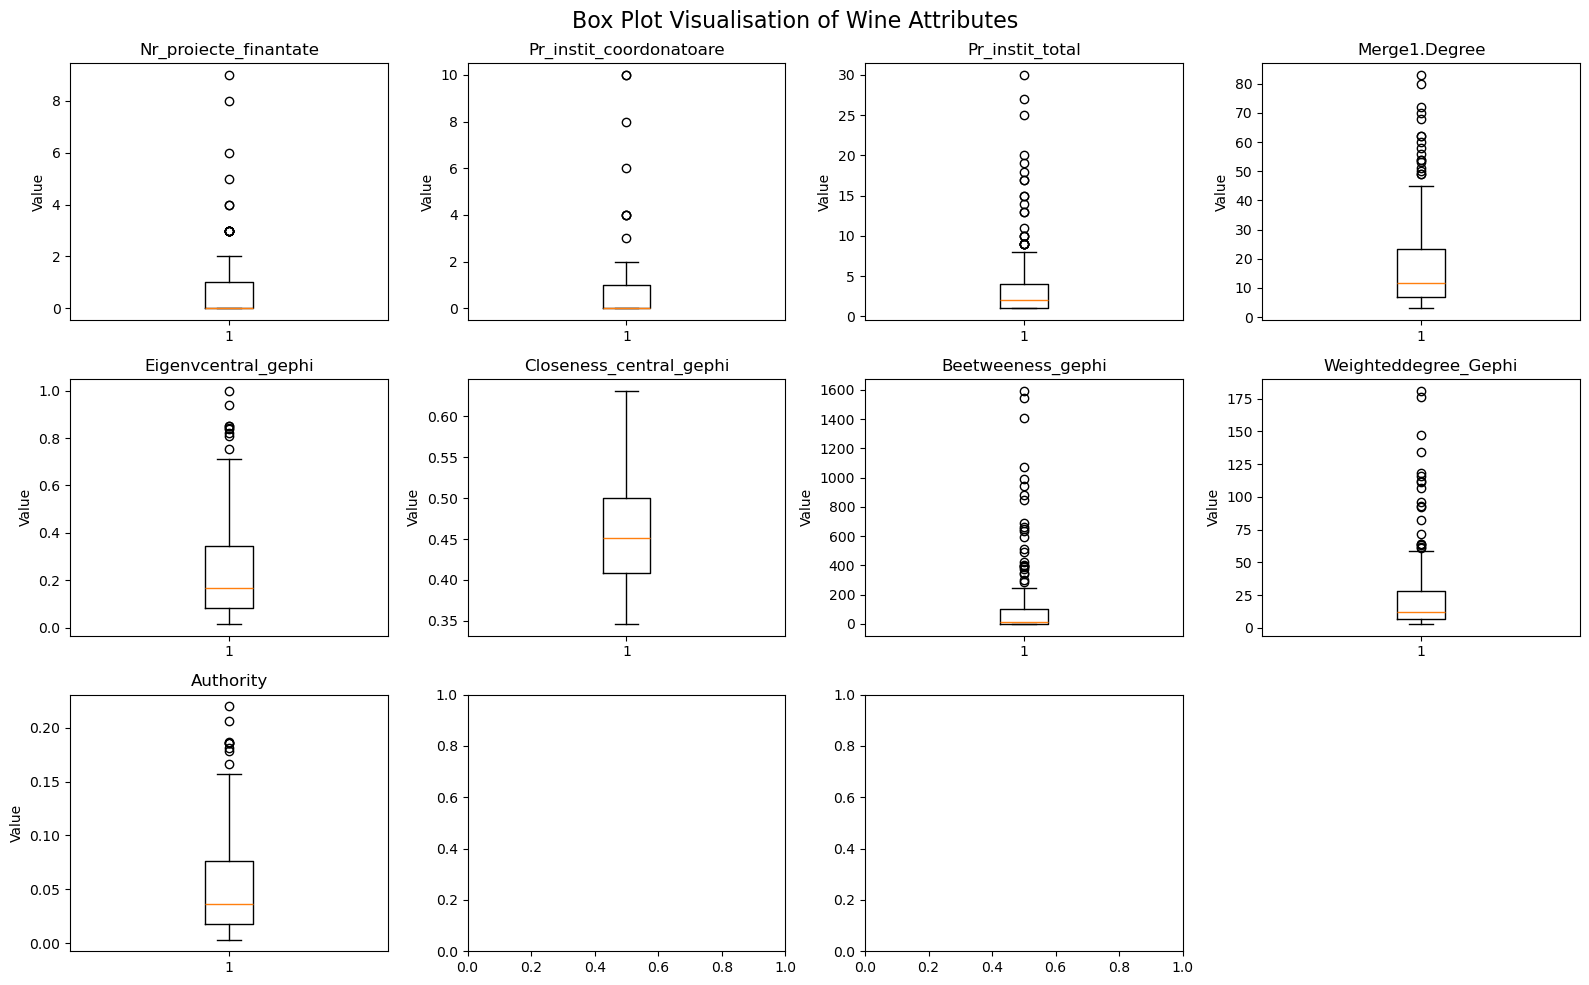

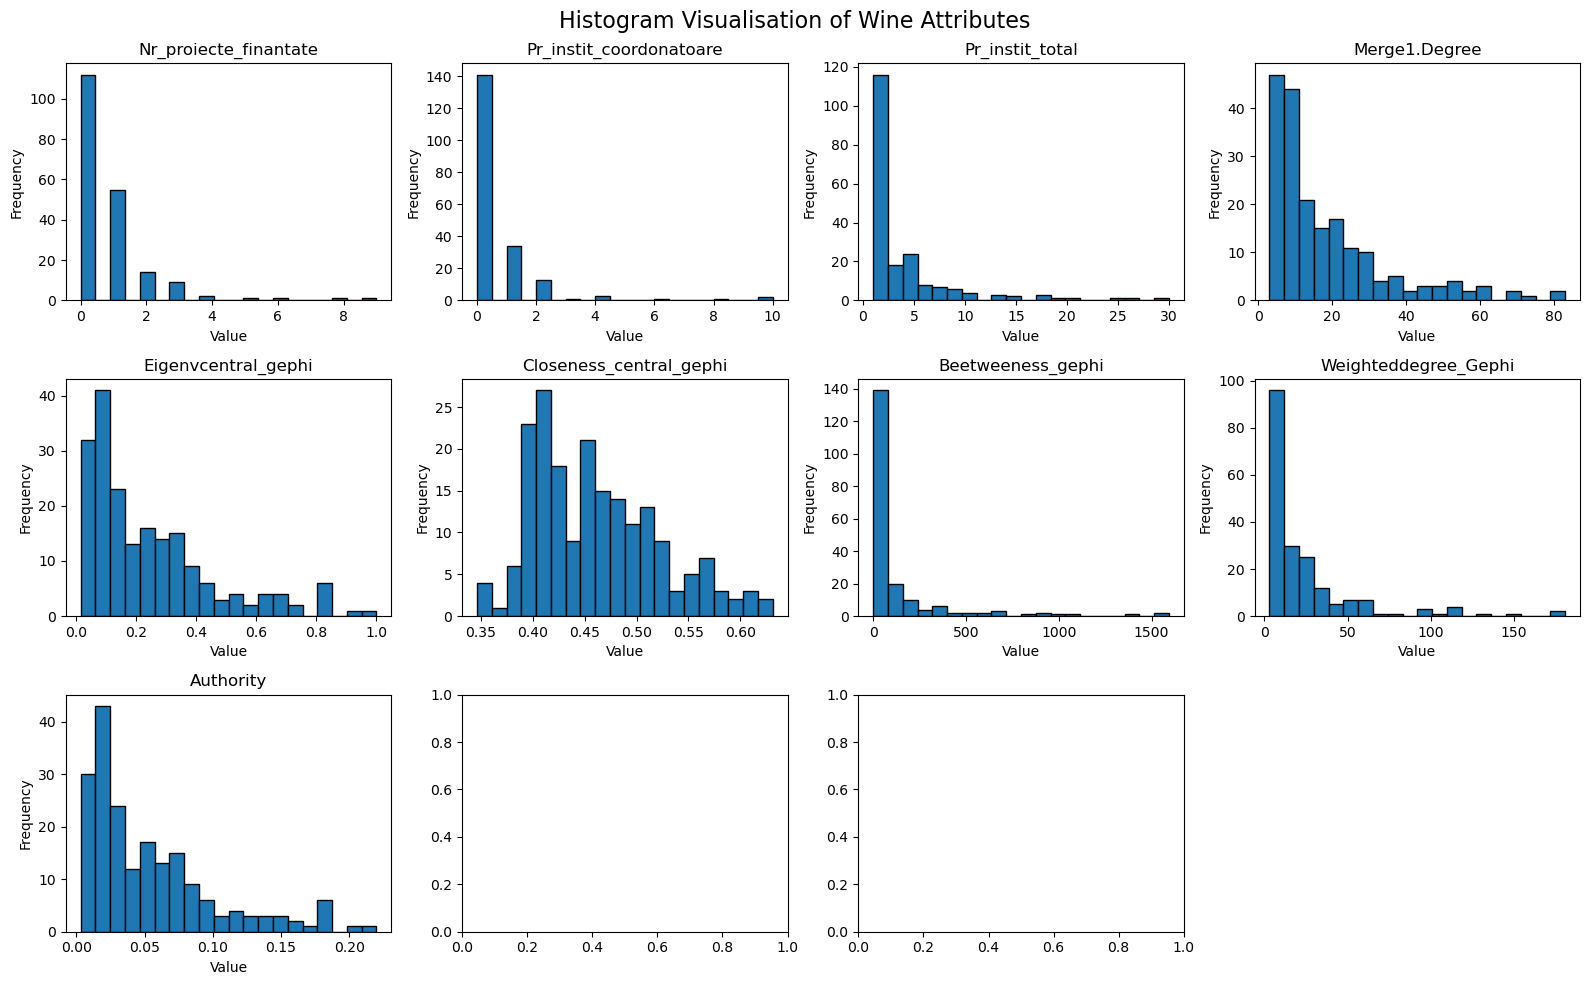

In [10]:
fig, ax = plt.subplots(3, 4, figsize=(16, 10))
ax = ax.flatten()

for i, col in enumerate(attributes_formatted):
    ax[i].boxplot(df[col], vert=True)
    ax[i].set_title(col)
    ax[i].set_ylabel("Value")

fig.delaxes(ax[-1])
fig.suptitle("Box Plot Visualisation of Wine Attributes", fontsize=16)
plt.tight_layout()
plt.show()

# HISTOGRAMS
fig, ax = plt.subplots(3, 4, figsize=(16, 10))
ax = ax.flatten()

for i, col in enumerate(attributes_formatted):
    ax[i].hist(df[col], bins=20, edgecolor="black")
    ax[i].set_title(col)
    ax[i].set_xlabel("Value")
    ax[i].set_ylabel("Frequency")

fig.delaxes(ax[-1])
fig.suptitle("Histogram Visualisation of Wine Attributes", fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
df.rename(columns={"Merge1.Degree": "merge1_degree"}, inplace=True)

In [16]:
df['Entitate'] = df['Entitate'].astype(str)
df['Abreviere'] = df['Abreviere'].astype(str)
df['Reg_dezvoltare'] = df['Reg_dezvoltare'].astype(str)
df['Attribute_tip_institutie_original'] = df['Attribute_tip_institutie_original'].astype(str)

In [17]:
df_cleaned = df
df_cleaned.to_csv(r'src\date_univ_cleaned.csv', index=False)

In [18]:
print(df_cleaned.columns)
print(df.dtypes)

Index(['Entitate', 'Nr_proiecte_finantate', 'Abreviere',
       'Attribute_tip_institutie_original', 'Reg_dezvoltare',
       'Pr_instit_coordonatoare', 'Pr_instit_total', 'merge1_degree',
       'Eigenvcentral_gephi', 'Closeness_central_gephi', 'Beetweeness_gephi',
       'Weighteddegree_Gephi', 'Authority'],
      dtype='object')
Entitate                              object
Nr_proiecte_finantate                  int64
Abreviere                             object
Attribute_tip_institutie_original     object
Reg_dezvoltare                        object
Pr_instit_coordonatoare                int64
Pr_instit_total                        int64
merge1_degree                          int64
Eigenvcentral_gephi                  float64
Closeness_central_gephi              float64
Beetweeness_gephi                    float64
Weighteddegree_Gephi                   int64
Authority                            float64
dtype: object
